### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.  
b. Visualize the results of your clustering.  
c. Use the elbow method to visually select a good value for k.  
d. Repeat the clustering, this time with 3 different features.  

In [2]:
df = sns.load_dataset("iris")

# Feature Engineering
df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [3]:
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [4]:
# Scale the datasets
scaler = StandardScaler()
cols = train.drop(columns=["species"]).columns.tolist()

# .copy() makes a proper copy
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [5]:
# Fit K-Means
X = train_scaled[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
86,1.039148,0.164244,0.510148,0.373142,versicolor,0.874447,0.255092,1
82,-0.075700,-0.789432,0.038638,-0.038076,versicolor,-0.610737,-0.266638,0
109,1.658507,1.356340,1.335292,1.743869,virginica,2.371258,2.060234,1
147,0.791404,-0.074175,0.804843,1.058506,virginica,0.505331,0.992559,1
49,-1.066675,0.641083,-1.434833,-1.408803,setosa,-0.366597,-1.235250,2


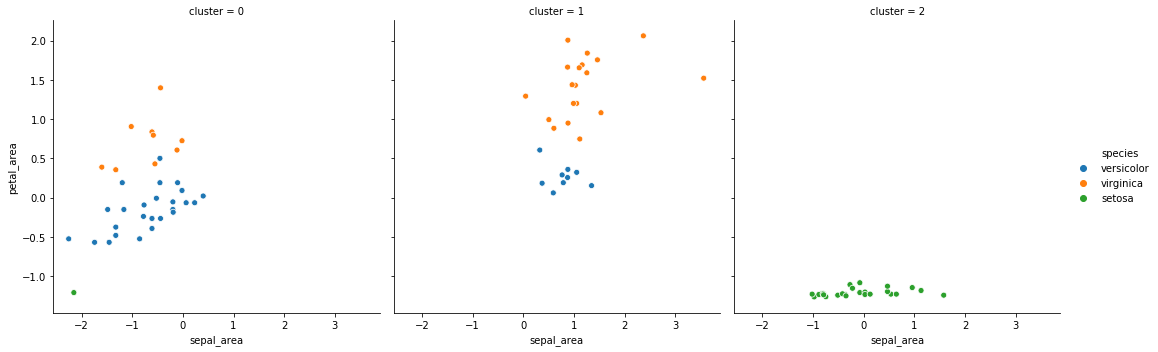

In [6]:
# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", data=train_scaled)

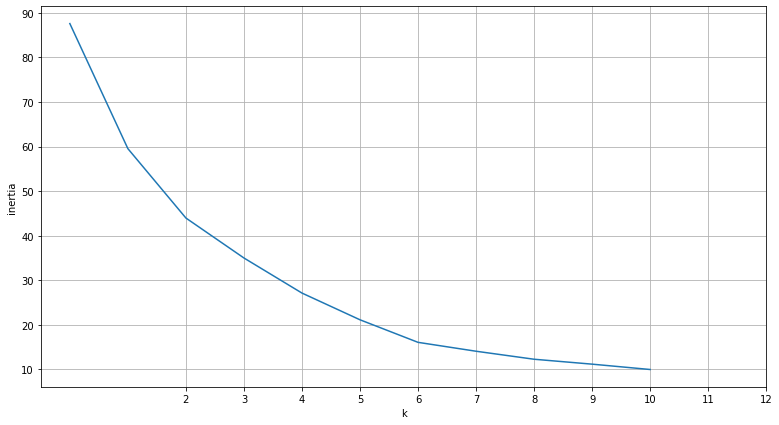

In [7]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [8]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
86,1.039148,0.164244,0.510148,0.373142,versicolor,0.874447,0.255092,1
82,-0.075700,-0.789432,0.038638,-0.038076,versicolor,-0.610737,-0.266638,0
109,1.658507,1.356340,1.335292,1.743869,virginica,2.371258,2.060234,1
147,0.791404,-0.074175,0.804843,1.058506,virginica,0.505331,0.992559,1
49,-1.066675,0.641083,-1.434833,-1.408803,setosa,-0.366597,-1.235250,2


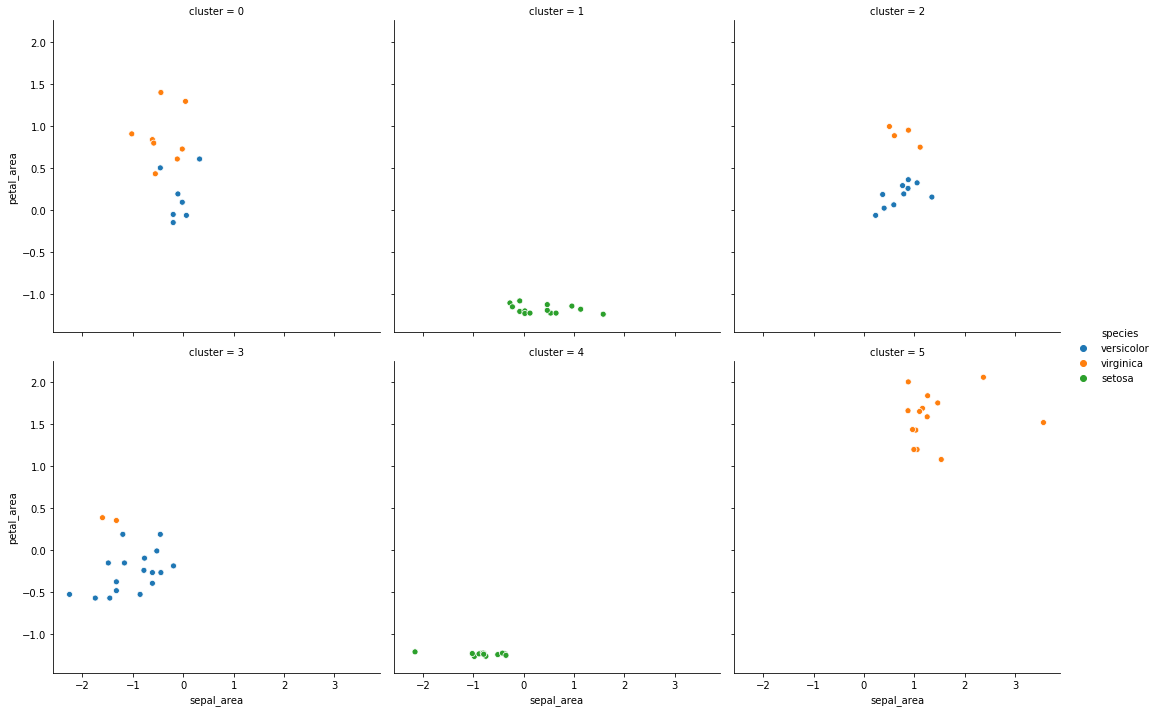

In [9]:
# Fit K-Means
X = train_scaled[["sepal_area", "petal_area", "sepal_length", "petal_width"]]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", col_wrap=3, data=train_scaled)

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [ ]:
import env

db_name = "mall_customers"
query = 'SELECT * FROM customers'

url = env.get_url(db_name)
df = pd.read_sql(query, url, index_col="customer_id")

# Encode gender
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

# Split nice and early
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

In [ ]:
# Scale the datasets

# Start w/ empty copies to retain the original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# Scale the datasets
scaler = StandardScaler()
cols = train.drop(columns=["gender"]).columns.tolist()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

# Add back in the gender column to the dataframes
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()

In [ ]:
X = train_scaled.copy()

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [ ]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

In [ ]:
sns.relplot(x="annual_income", y="spending_score", data=train_scaled)

In [ ]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep", data=train_scaled)

In [ ]:
plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()

In [ ]:
# 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=4

# Fit K-Means
X = train_scaled.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

In [ ]:
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)

In [ ]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="age", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)

In [ ]:
# One column per gender value
# One color/shape for each cluster label
sns.relplot(x="annual_income", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)

#### 3. How does scaling impact the results of clustering?  

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [ ]:
# Choose 5

# Fit K-Means
X = train.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_
plt.scatter(train.spending_score, train.annual_income, c=train.cluster)

In [ ]:
sns.relplot(x="age", y="spending_score", col="cluster", data=train)

In [ ]:
sns.relplot(x="age", y="annual_income", col="cluster", data=train)

In [ ]:
sns.relplot(x="age", y="gender", col="cluster", data=train)